Projet numérique n°2 : équations différentielles 
===========

In [4]:
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt

### Question 1 : 

$(\imath)$ signification des termes des équations de Lotka-Volterra
   - le terme en $\alpha$ traduit le facteur de reproduction des proies

   - le terme en $\beta$ traduit le facteur d'élimination des proies par les prédateurs

   - le terme en $\gamma$ traduit le facteur de mort des prédateurs

   - enfin, le terme en $\delta$ traduit le facteur de reproduction des prédateurs

$(\imath \imath)$ Recherche des points d'équilibre

Les équations de Lotka-Volterra peuvent s'écrire sous la forme : $ \frac{dX}{dt} = f(X) $ avec $X = \begin{pmatrix}{x_1} \\ {x_2} \end{pmatrix} $ et $f : (x_1,x_2) \in \mathbb{R}^2 \mapsto (x_1(\alpha - \beta x_2) ; -x_2(\gamma - \delta x_1))$

Pour trouver les éventuels points d'équilibre correspondant, on résout : 
$ f(x_1,x_2) = 0 \Leftrightarrow 
\left\{
   \begin{array}{ll}
      x_1(\alpha - \beta x_2) = 0 \\
      - x_2(\gamma - \delta x_1) = 0
   \end{array}
\right.
\Leftrightarrow
\left\{
   \begin{array}{ll}
      (x_1, x_2) = (0, 0) \\
      (x_1, x_2) = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})
   \end{array}
\right. 
$

Il y a donc deux points d'équilibre : $(0, 0)$ et $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$

$(\imath \imath \imath)$ Etude préliminaire de la stabilité des points d'équilibre 

Pour chaque point d'équilibre, comme $f$ est continuement différentiable (car polynômiale en $x_1$ et $x_2$), on utilise le critère de stabilité du linéarisé tangent en calculant 
$J_f (x) $ la matrice jacobienne de f et en l'évaluant en au point d'équilibre considéré. On observe ensuite le signe de la partie réelle des éventuelles valeurs propores. 

$J_f (x_1,x_2) = 
\begin{pmatrix}
\alpha-\beta x_2 \;\;\;\;\; \beta x_1 \\
\gamma x_2 \;\;\;\;\; \gamma x_1 - \delta
\end{pmatrix}
$

   - point d'équilibre $(0,0)$ : 
$J_f (0,0) = 
\begin{pmatrix}
\alpha \;\;\;\;\; 0 \\
0 \;\;\;\;\; -\gamma
\end{pmatrix}
$

Ainsi, $J_f (0,0)$ admet $\alpha$ et $-\gamma$ pour valeur propre et comme $\alpha$ (réelle) a une partie réelle strictement positive, $(0,0)$ est instable.

   - point d'équilibre $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ :
$J_f (\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) = 
\begin{pmatrix}
0 \;\;\;\;\; - \beta \frac{\gamma}{\delta} \\
\sigma \frac{\alpha}{\beta} \;\;\;\;\; 0
\end{pmatrix}
$

Le polynome caractéristique de $J_f (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ étant : $(X-i \sqrt{\alpha \gamma})(X+i \sqrt{\alpha \gamma})$, on en déduit que cette matrice admet deux valeurs propres à parties réelles nulles : $ i \sqrt{\alpha \gamma}$ et $-i \sqrt{\alpha \gamma}$. On ne peut donc conclure à ce stade sur la stabilité du point d'équilibre $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$.

### Question 2 :

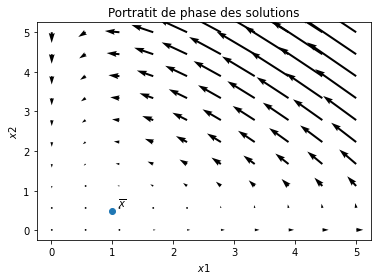

In [5]:
a,b,g,d = 2/3, 4/3, 1, 1

n=10

x=np.linspace(0.01, 5, n)
y=np.linspace(0.01, 5, n)

X,Y = np.meshgrid(x,y)

def f(x,y):
    return [x*(a-b*y),-y*(g-d*x)]

X1=np.zeros(n*n).reshape(n,n)
X2=np.zeros(n*n).reshape(n,n)


for i in range(n):
    for j in range(n):
        x1, x2 = X[i, j], Y[i, j]
        X1[i,j],X2[i,j]=f(x1,x2)

plt.quiver(X,Y,X1,X2)

plt.scatter([g/d],[a/b])

#plt.streamplot(X, Y, X1, X2, density = 0.4) 

plt.title("Portratit de phase des solutions")
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.text(g/d+0.1, a/b+0.1, "$\overline{x}$")
plt.show()

### Question 3 :

Considérons le problème de Cauchy suivant, initialisé dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ : 
$
\left\{
    \begin{array}{ll}
        \frac{dX}{dt} = f(X) \\
        X(t_0) = x_0
    \end{array}
\right.
$

Comme $f$ est continue et continuement différentiable, par le théorème de Cauchy-Lipschitz, ce problème admet une unique solution que l'on note $x$. Notons $J$ son ensemble de définition.

Supposons qu'il existe $t_1 > t_0$ dans $J$ tel que $x(t_1) = (0,a)$ avec $a \ge 0$

$x$ est alors également l'unique solution du problème de Cauchy : 
$
\left\{
    \begin{array}{ll}
        \frac{dX}{dt} = f(X) \\
        X(t_1) = (0,a)
    \end{array}
\right.
$

Donc $x(t) = (0; aexp(-\gamma(t-t_1)))$ ce qui est absurde puisque $x(t_0) \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$

On a donc par continuité des solutions à l'équation différentielle que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}$.

De même, on montre que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R} \times \mathbb{R_{>0}}$. Ce qui nous permet de conclure que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

### Question 4 :

$(\imath)$ Calcul de la dérivée de $H$ le long d'une solution maximale $x=(x_1,x_2)$ définie sur un intervalle $J$ et initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ :

$\frac{d}{dt}H(x(t)) = \partial_1 H(x(t)) \frac{dx_1}{dt}(t) + \partial_2 H(x(t)) \frac{dx_2}{dt}(t) = (\delta - \frac{\gamma}{x_1})x_1(\alpha - \beta x_2) - (\beta - \frac{\alpha}{x_2})x_2(\gamma - \delta x_1) = 0$

$(\imath\imath)$ Ainsi, il existe $c \in \mathbb{R}$ tel que pour $t \in J$, on ait : $H(x(t)) = \delta x_1 - \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2) = c$.

De plus, comme $ln(x) = o(x)$ en $+ \infty$ on a l'existence d'un $A$ tel que pour $x \geq A, \gamma \cdot ln(x) < \frac{\delta x}{2}$ et $ \alpha \cdot ln(x) < \frac{\beta x}{2}$. 

$(\imath\imath\imath)$ Notons $J=]t_m^+;t_m^-[$. Supposons par exemple $t_m^+ \in \mathbb{R}$. D'après le théorème du domaine maximal, $(t, x(t))$ tend soit vers la frontière du domaine de définition de $f$, soit diverge. Comme $f$ est définie et continue sur $\mathbb{R} \times \mathbb{R} ^2$, nécessairement, $\lim\limits_{t \rightarrow t_m^+} \|x(t)\| = +\infty$ donc $x_1$ ou $x_2$ tend vers $+ \infty$ quand $t$ tend vers $t_m^+$. On a donc une contradiction avec le $(\imath\imath)$ ($x_1$ et $x_2$ sont strictements positifs). Donc $t_m^+ = + \infty$. Par un raisonnement analogue, on montre que $t_m^- = - \infty$ et donc que toute solution maximale initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$.

### Question 5 :

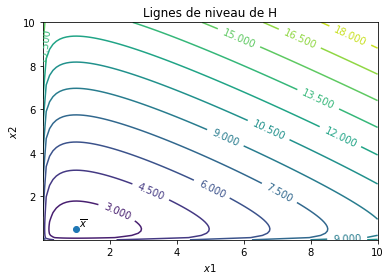

In [6]:
a,b,g,d = 2/3, 4/3, 1, 1

x=np.linspace(0.01, 10, 100)
y=np.linspace(0.01, 10, 100)

X,Y = np.meshgrid(x,y)

def H(x,y):
    return d*x-g*np.log(x)+b*y-a*np.log(y)

Z=H(X,Y)

C=plt.contour(X,Y,Z,15)
plt.scatter([g/d],[a/b])

plt.title("Lignes de niveau de H")
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.clabel(C)
plt.text(g/d+0.1, a/b+0.1, "$\overline{x}$")
plt.show()

### Question 6 :

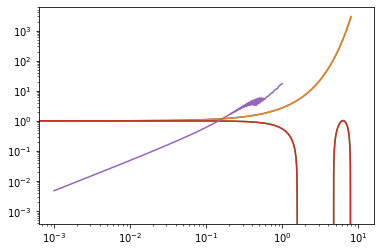

In [7]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    n=int((tf-t0)/dt)
    t=np.zeros(n)
    if type(x0) is int:
        x=np.zeros(n)
    else:
        x=np.zeros((n,len(x0)))
    t[0]=t0
    x[0]=np.array(x0)
    for i in range(1,n):
        t[i]=t[i-1]+dt
        x[i]=x[i-1]+dt*np.array(f(t[i-1],x[i-1]))
    return t,x


def f(t,x):
    return x

def f2(t,x):
    return [-x[1],x[0]]

t,x = solve_euler_explicit(f,1,0.01,0,8)

plt.plot(t,x)
plt.plot(t,np.exp(t))


t,x = solve_euler_explicit(f2,[0,1],0.01,0,10)

plt.plot(t,x[::,1])
plt.plot(t,np.cos(t))

#plt.plot(t,np.exp(t))

def erreur(ech):
    err=np.zeros(ech.size)
    for i in range(ech.size):
        t,x = solve_euler_explicit(f2,[0,1],ech[i],0,10)
        err[i] = max(np.abs(x[::,1]-np.cos(t)))
    return err

ech=np.linspace(0.001,1,1000)

plt.plot(ech,erreur(ech))

plt.xscale('log')
plt.yscale('log')

### Question 7 :

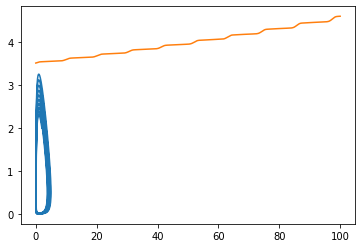

In [8]:
a,b,g,d = 2/3, 4/3, 1, 1

def f(t,x):
    return [x[0]*(a-b*x[1]),-x[1]*(g-d*x[0])]



def solve_euler_explicit(f,x0,dt,t0,tf):
    n=int((tf-t0)/dt)
    t=np.zeros(n)
    x=np.zeros((n,len(x0)))
    t[0]=t0
    x[0]=np.array(x0)
    for i in range(1,n):
        t[i]=t[i-1]+dt
        x[i]=x[i-1]+dt*np.array(f(t[i-1],x[i-1]))
    return t,x


t,x = solve_euler_explicit(f,[2,2],0.01,0,100)



#plt.plot(t,x[::,0])
#plt.plot(t,x[::,1])
plt.plot(x[::,0],x[::,1])


def H(x,y):
    return d*x-g*np.log(x)+b*y-a*np.log(y)


plt.plot(t,H(x[::,0],x[::,1]))

### Question 8 :

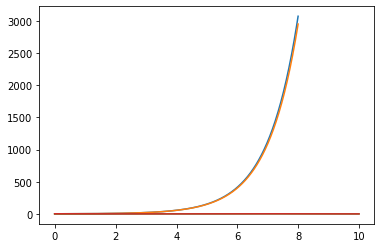

In [9]:
def solve_euler_implicit(f,x0,dt,t0,tf,itermax=100):
    n=int((tf-t0)/dt)
    t=np.zeros(n)
    if type(x0) is int:
        x=np.zeros(n)
    else:
        x=np.zeros((n,len(x0)))
    t[0]=t0
    x[0]=np.array(x0)
    for i in range(1,n):
        t[i]=t[i-1]+dt
        xo=x[i-1]+dt*np.array(f(t[i-1],x[i-1]))
        xi=xo
        for j in range(itermax):
            x_temp=xi
            xi=x[i-1]+dt*np.array(f(t[i],xi))
            if np.abs(np.linalg.norm((xi-x_temp))/np.linalg.norm(xo))<0.0001*dt*dt:
                #print(np.abs((xi-x_temp)/xo))
                #print(j)
                break
        x[i]=xi
    return t,x


def f(t,x):
    return x

def f2(t,x):
    return [-x[1],x[0]]

t,x = solve_euler_implicit(f,1,0.01,0,8)

plt.plot(t,x)
plt.plot(t,np.exp(t))



t,x = solve_euler_implicit(f2,[0,1],0.01,0,10)

plt.plot(t,x[::,1])
plt.plot(t,np.cos(t))

### Question 9 :



### Question 10 :

$(\imath)$ Calcul de la dérivée de $H-H_0$ le long d'une solution $x=(x_1,x_2)$ du système :

$\frac{d}{dt}(H(x(t))-H_0)= \partial_1 H(x(t)) \frac{dx_1}{dt}(t) + \partial_2 H(x(t)) \frac{dx_2}{dt}(t) = (H(x)-H_0)((\frac{\gamma}{x_1}-\delta)u_1(x_1,x_2)+(\frac{\alpha}{x_2}-\beta)u_2(x_1,x_2))$

$(\imath\imath)$ En choisissant $u:(x_1,x_2) \in \mathbb{R}^2 \mapsto -k(\delta + \frac{\gamma}{x_1}, \beta -\frac{\alpha}{x_1})$ on obtient bien l'égalité souhaitée.

$(\imath\imath\imath)$ On suppose que $x$ reste à une distance strictement positive de $\overline{x}$. Prenons par exemple $\|x(t)- \overline{x} \| \geq m := inf(d(\overline{x},x)^2)= inf((\frac{\gamma}{\delta}-x_1)^2 + (\frac{\alpha}{\beta}-x_2)^2)> 0$.

   - On a alors pour $x \in \mathbb{R}^2$ : $\|\nabla H(x(t))\|^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2 = (\frac{\delta}{x_1})^2 (x_1- \frac{\gamma}{\delta})^2 + (\frac{\beta}{x_1})^2 (x_2 - \frac{\alpha}{\beta})^2 \geq min((\frac{\delta}{x_1})^2,(\frac{\beta}{x_2})^2) \cdot m := M > 0$ 

Ainsi, on obtient que $\frac{d}{dt} (H(x(t))-H_0) \leq -k \cdot M^2 \cdot (H(x(t)) - H_0)$.

   - On a donc l'inéquation suivante, avec $\overline{H}(t) = H(x(t)) - H_0$ : $\frac{d}{dt}\overline{H} + kM^2 \overline{H} \leq 0$. On pose alors $f = \frac{d}{dt}\overline{H} + k M^2 \overline{H}$ ce qui nous donne en résolvant (avec variation de la constante) : 
   $\overline{H} = e^{-kM^2t}(A+ \int_{0}^{t}fe^{kM^2x})dx$ avec $A$ une constante non nulle (on a traité question 9 le cas où $H_0 = H(x(0))$).

   Puisque l'inéquation impose que $f \leq 0$, par croissance de l'intégrale, on a finalement que : $ H(x(t)) - H_0 \leq Ae^{-kM^2 t}$ ce qui prouve la convergence exponentielle de $H(x(t))$ vers $H_0$ lorsque $t$ tend vers $+ \infty$.





